# Speed comparison CPU/GPU -  MNIST Example using fast.ai

Example from https://github.com/fastai/fastai/blob/master/examples/vision.ipynb

In [1]:
import torch
if torch.cuda.device_count() > 0:
    print('using GPU:', torch.cuda.get_device_name(0))
else:
    import multiprocessing
    cpu_type = !cat /proc/cpuinfo
    for line in str(cpu_type).split(','):
            if "model name" in line:
                cpu_type = re.sub( ".*model name.*:", "", line, 1)
                break
    print('using', multiprocessing.cpu_count(), 'CPUS on', cpu_type)


using GPU: GeForce GTX 1060 with Max-Q Design


## Data preparation and imports

not relevant, should be about the same.

In [5]:
%reload_ext autoreload
%autoreload 2

import fastai
from fastai import *          # Quick access to most common functionality
from fastai.vision import *   # Quick access to computer vision functionality

In [6]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/home/jovyan/.fastai/data/mnist_sample')

In [7]:
!ls -lah $path/

total 300K
drwxr-x--- 5 jovyan users 4.0K Oct 23 08:45 .
drwxr-sr-x 3 jovyan users 4.0K Oct 23 08:44 ..
-rw-rw-r-- 1 jovyan users 278K Sep 26 18:54 labels.csv
drwxr-xr-x 2 jovyan  1000 4.0K Oct 23 08:45 models
drwxr-x--- 4 jovyan users 4.0K Sep 26 18:15 train
drwxr-x--- 4 jovyan users 4.0K Sep 26 18:15 valid


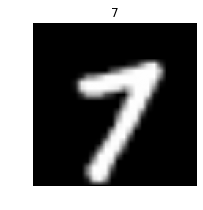

In [8]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), tfms=imagenet_norm, size=224)
img,label = data.valid_ds[-1]
img.show(title=data.classes[label])

## Resnet 18

Using a pretrained net


In [9]:
learn = ConvLearner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/jovyan/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:02<00:00, 18923575.94it/s]


Total time: 00:45
epoch  train loss  valid loss  accuracy
1      0.038247    0.015904    0.993621  (00:45)



In [10]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

Total time: 05:52
epoch  train loss  valid loss  accuracy
1      0.016354    0.003974    0.999019  (00:57)
2      0.009721    0.004661    0.999019  (00:57)
3      0.007826    0.005604    0.997547  (00:57)
4      0.004863    0.001526    0.999509  (00:59)
5      0.004223    0.002429    0.999019  (01:01)
6      0.003100    0.000858    0.999509  (00:58)



In [11]:
accuracy(*learn.TTA())

Total time: 00:37



tensor(0.9990)